In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:

#Used to plot data in csv
def plot_points(X,y):
  plt.scatter(X[np.argwhere(y==0).flatten(),0], X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
  plt.scatter(X[np.argwhere(y==1).flatten(),0], X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

  plt.xlim(-2.05,2.05)
  plt.ylim(-2.05,2.05)
  plt.grid(False)
  plt.tick_params(
      axis='x',
      which='both',
      bottom=False,
      top=False)
  plt.show()

In [0]:

#Used to plot the resulting model
def plot_model(X, y, clf):
    plt.scatter(X[np.argwhere(y==0).flatten(),0],X[np.argwhere(y==0).flatten(),1],s = 50, color = 'blue', edgecolor = 'k')
    plt.scatter(X[np.argwhere(y==1).flatten(),0],X[np.argwhere(y==1).flatten(),1],s = 50, color = 'red', edgecolor = 'k')

    plt.xlim(-2.05,2.05)
    plt.ylim(-2.05,2.05)
    plt.grid(False)
    plt.tick_params(
        axis='x',
        which=False,
        bottom=False,
        top=False)

    r = np.linspace(-2.1,2.1,300)
    s,t = np.meshgrid(r,r)
    s = np.reshape(s,(np.size(s),1))
    t = np.reshape(t,(np.size(t),1))
    h = np.concatenate((s,t),1)

    z = clf.predict(h)

    s = s.reshape((np.size(r),np.size(r)))
    t = t.reshape((np.size(r),np.size(r)))
    z = z.reshape((np.size(r),np.size(r)))

    plt.contourf(s,t,z,colors = ['blue','red'],alpha = 0.2,levels = range(-1,2))
    if len(np.unique(z)) > 1:
        plt.contour(s,t,z,colors = 'k', linewidths = 2)
    plt.show()

In [0]:
df = pd.read_csv("data.csv")


In [18]:
# Os dados são salvos em um data frame
df[:5]

,x1,x2,y
0,0.78051,-0.063669,0
1,0.28774,0.291390,0
2,0.40714,0.178780,0
3,0.29230,0.421700,0
4,0.50922,0.352560,0


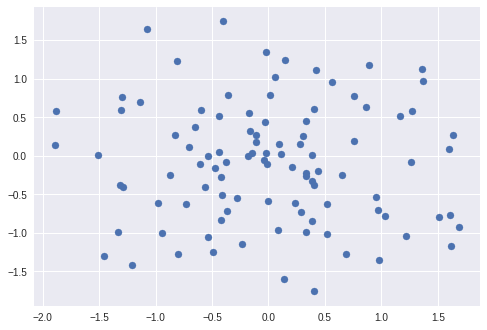

In [29]:
plt.scatter(df['x1'], df['x2'])


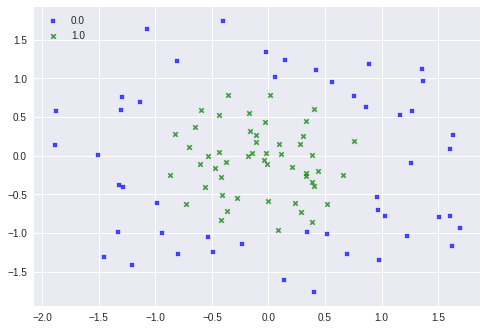

In [30]:
from mlxtend.plotting import category_scatter
fig = category_scatter(x='x1', y='x2', label_col='y', 
                       data=df, legend_loc='upper left')

In [31]:
# Getting the first two columns of a data frame
df[:5][['x1','x2']]

,x1,x2
0,0.336494,-0.985951
1,-0.011043,-0.105529
2,0.238160,-0.617417
3,-0.366783,-0.713819
4,1.221923,-1.039399


In [0]:
X = np.array(df[['x1','x2']])
y = np.array(df['y'])

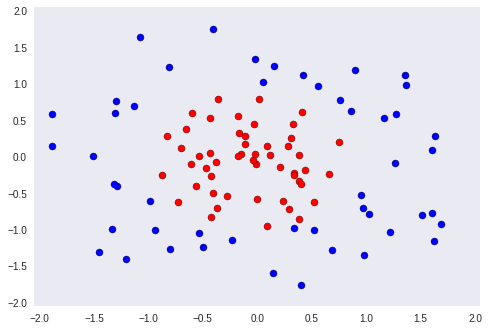

In [36]:
plot_points(X,y)

In [33]:
X[:3]

array([[ 0.33649358, -0.98595099],
       [-0.01104253, -0.10552856],
       [ 0.23815951, -0.61741666]])

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


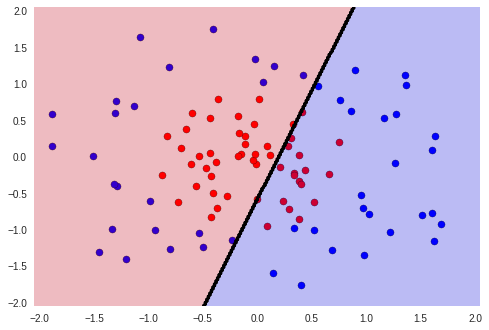

In [37]:

# Logistic Regression Classifier
classifier = LogisticRegression()
classifier.fit(X,y)
plot_model(X,y,classifier)


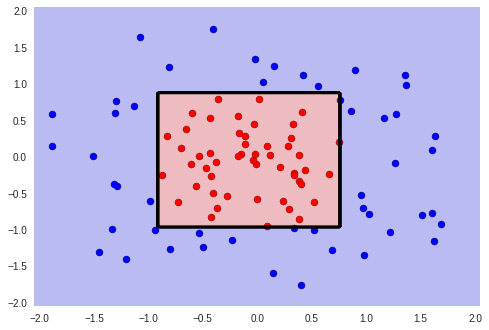

In [42]:

# Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X,y)
plot_model(X,y,classifier)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


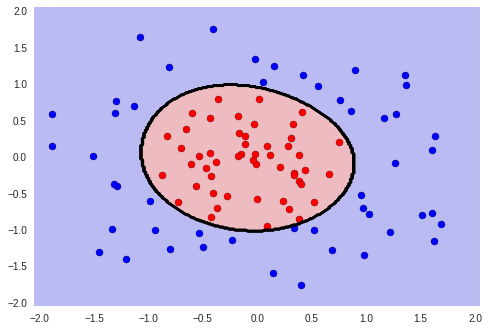

In [44]:
# Support Vector Machine Classifier
classifier = SVC()
classifier.fit(X,y)
plot_model(X,y,classifier)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


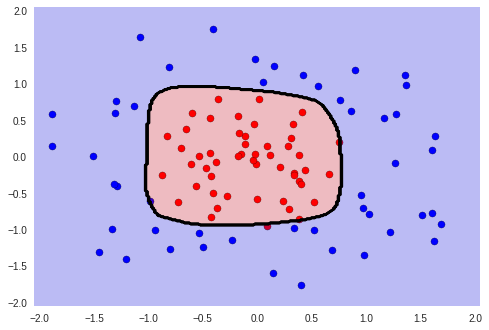

In [46]:
# using neural network
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(X,y)
plot_model(X,y,classifier)